# Atividade 03
Bianca Bonetti Nunes

### Importando a série temporal de interesse

In [92]:
# Importanto pacotes
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
#importando a planilha com dados
cwd = os.getcwd()
path = cwd+'\\Dados\\ES_planilhacompleta.csv'
print(path)
data = pd.read_csv(path,encoding='latin-1')
data.head()

C:\Users\BiaBN\OneDrive\Documentos\ENS410064\Dados\ES_planilhacompleta.csv


C:\Users\BiaBN\AppData\Local\Temp\ipykernel_12160\3387021123.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path,encoding='latin-1')


,Ano,Mes,Dia,Hora,Minuto,Estacao,Estacao.1,Poluente,Valor,Unidade,Tipo,Testacao
0,2023,1,1,0,30,Laranjeiras,ES_001,O3,29.89,ug/m3,Automatica,Referencia
1,2023,1,1,1,30,Laranjeiras,ES_001,O3,26.2,ug/m3,Automatica,Referencia
2,2023,1,1,2,30,Laranjeiras,ES_001,O3,20.27,ug/m3,Automatica,Referencia
3,2023,1,1,3,30,Laranjeiras,ES_001,O3,23.22,ug/m3,Automatica,Referencia
4,2023,1,1,4,30,Laranjeiras,ES_001,O3,21.53,ug/m3,Automatica,Referencia


### Filtrando os dados de uma só estação - A estação escolhida foi ES_001

In [94]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [95]:
laranjeiras = data.loc[(data['Estacao.1'] == 'ES_008')]  # Filtrando apenas a estação ES_001
laranjeiras.head()
#transformando a coluna Valor em float
laranjeiras['Valor'] = laranjeiras['Valor'].astype('float')
laranjeiras.dtypes

C:\Users\BiaBN\AppData\Local\Temp\ipykernel_12160\1158708167.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laranjeiras['Valor'] = laranjeiras['Valor'].astype('float')


Ano            int64
Mes            int64
Dia            int64
Hora           int64
Minuto         int64
Estacao       object
Estacao.1     object
Poluente      object
Valor        float64
Unidade       object
Tipo          object
Testacao      object
dtype: object

In [96]:
#checando se existem dados faltantes
print(np.sum(data.iloc[:].isna()))

c:\users\biabn\onedrive\documentos\ens410064\pyenv\lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Ano               0
Mes               0
Dia               0
Hora              0
Minuto            0
Estacao           0
Estacao.1         0
Poluente          0
Valor        182161
Unidade           0
Tipo              0
Testacao          0
dtype: int64


In [97]:
#Criando um datetime
laranjeiras['datetime'] = pd.to_datetime(laranjeiras[['Ano', 'Mes', 'Dia', 'Hora', 'Minuto']].astype(str).agg('-'.join,axis =1), format = '%Y-%m-%d-%H-%M')
laranjeiras = laranjeiras.set_index("datetime")
laranjeiras.head()

C:\Users\BiaBN\AppData\Local\Temp\ipykernel_12160\3116621975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laranjeiras['datetime'] = pd.to_datetime(laranjeiras[['Ano', 'Mes', 'Dia', 'Hora', 'Minuto']].astype(str).agg('-'.join,axis =1), format = '%Y-%m-%d-%H-%M')


,Ano,Mes,Dia,Hora,Minuto,Estacao,Estacao.1,Poluente,Valor,Unidade,Tipo,Testacao
datetime,,,,,,,,,,,,
2023-01-01 00:30:00,2023,1,1,0,30,Ibes,ES_008,MP25,NaN,ug/m3,Automatica,Referencia
2023-01-01 01:30:00,2023,1,1,1,30,Ibes,ES_008,MP25,NaN,ug/m3,Automatica,Referencia
2023-01-01 02:30:00,2023,1,1,2,30,Ibes,ES_008,MP25,NaN,ug/m3,Automatica,Referencia
2023-01-01 03:30:00,2023,1,1,3,30,Ibes,ES_008,MP25,NaN,ug/m3,Automatica,Referencia
2023-01-01 04:30:00,2023,1,1,4,30,Ibes,ES_008,MP25,NaN,ug/m3,Automatica,Referencia


### Fazendo graficos de linha para cada poluente


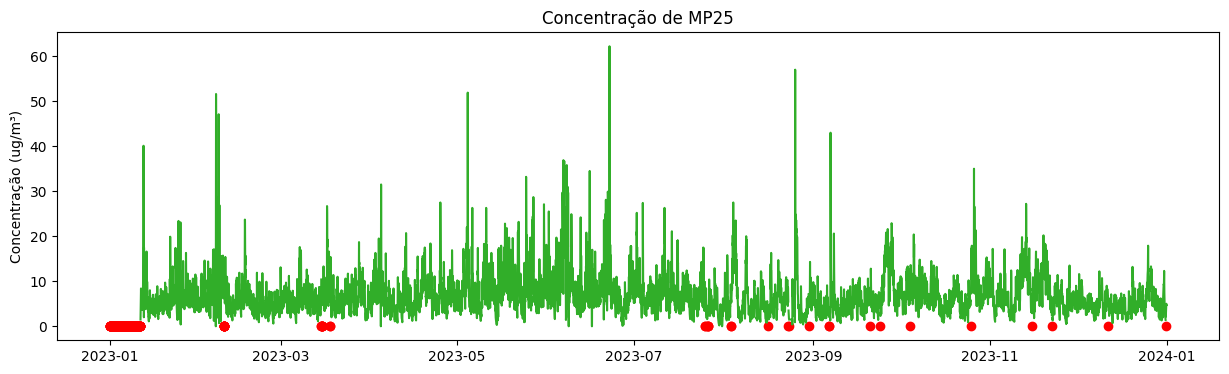

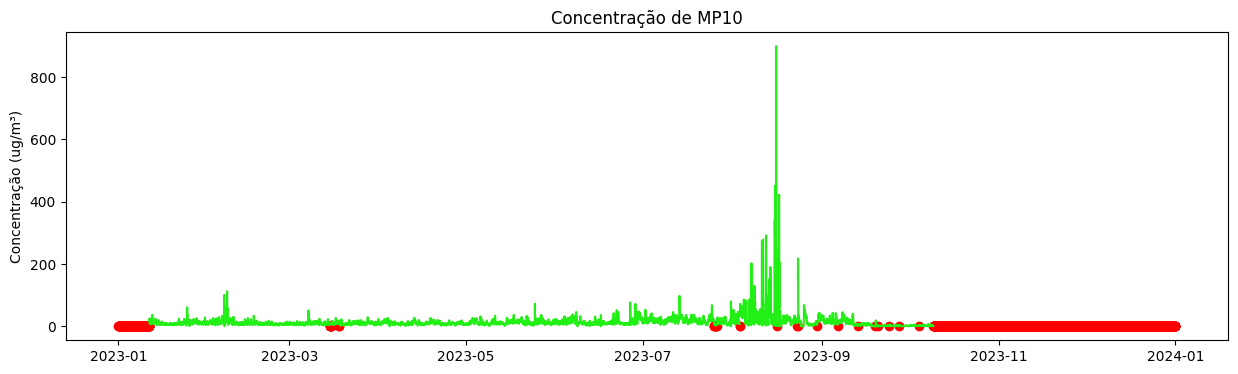

<Figure size 1500x400 with 0 Axes>

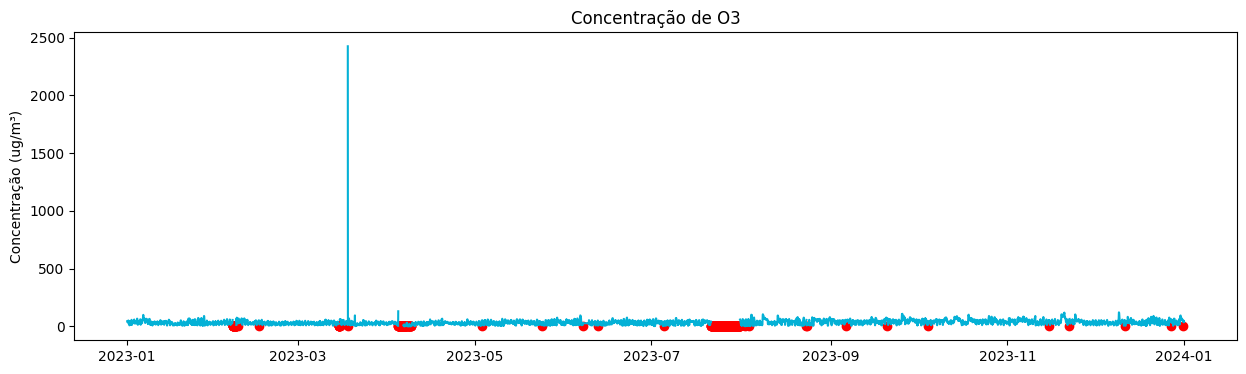

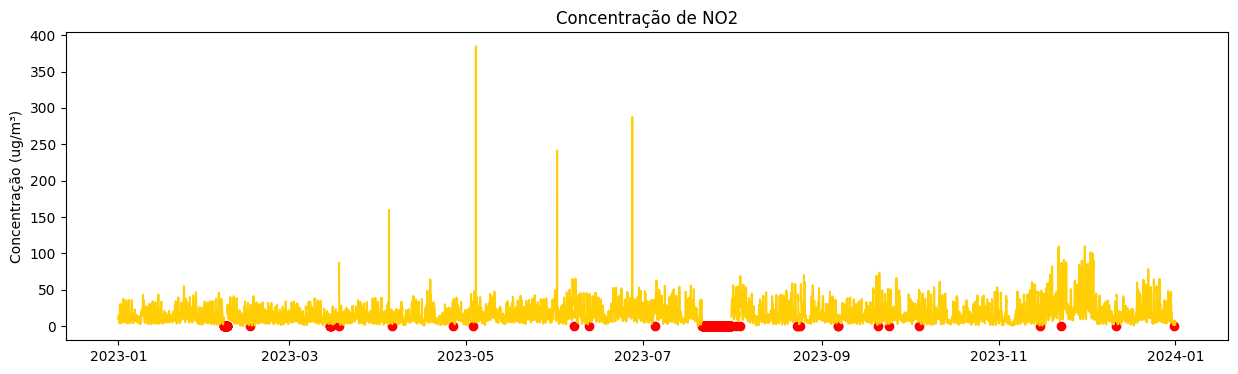

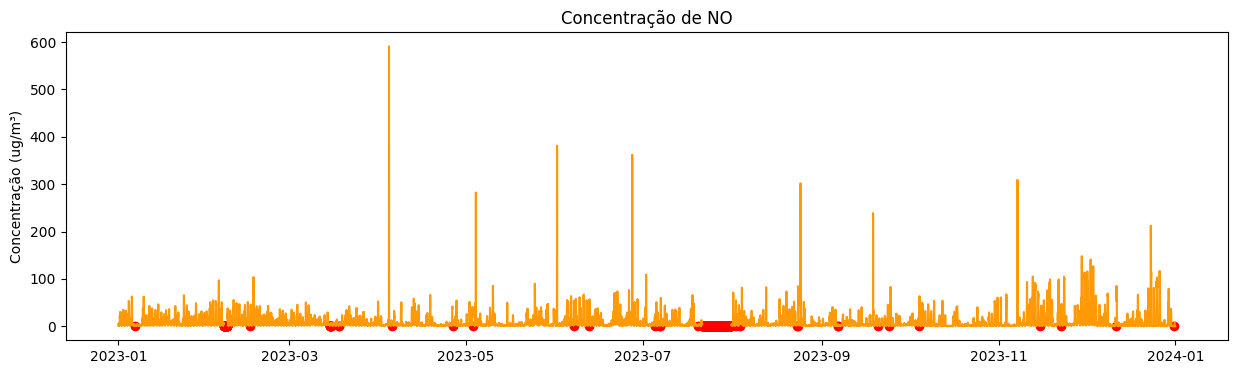

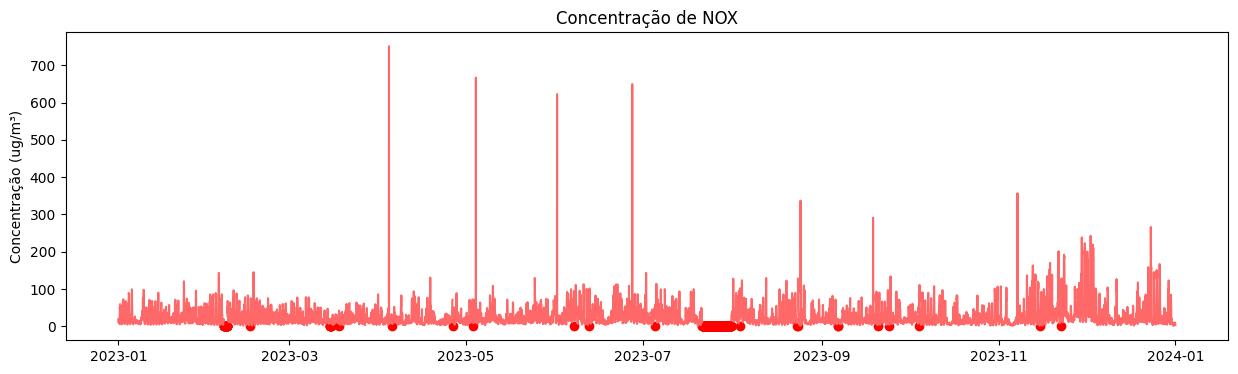

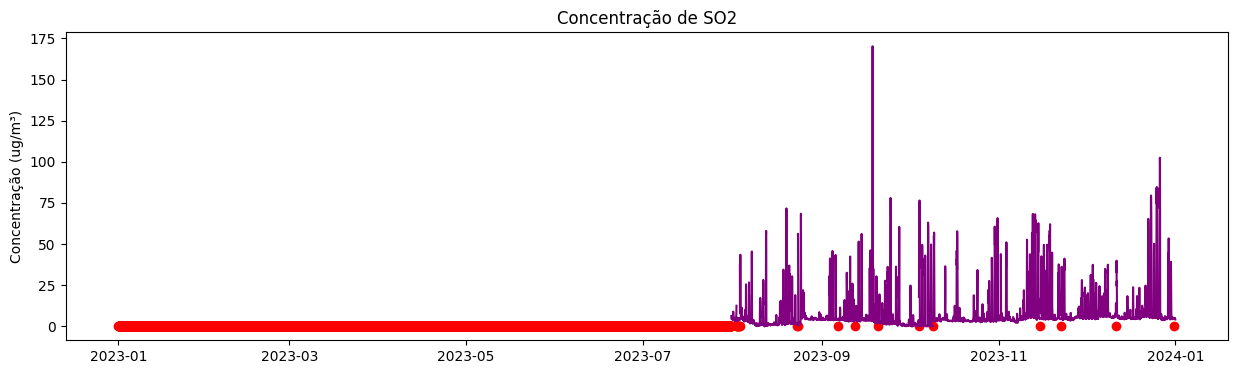

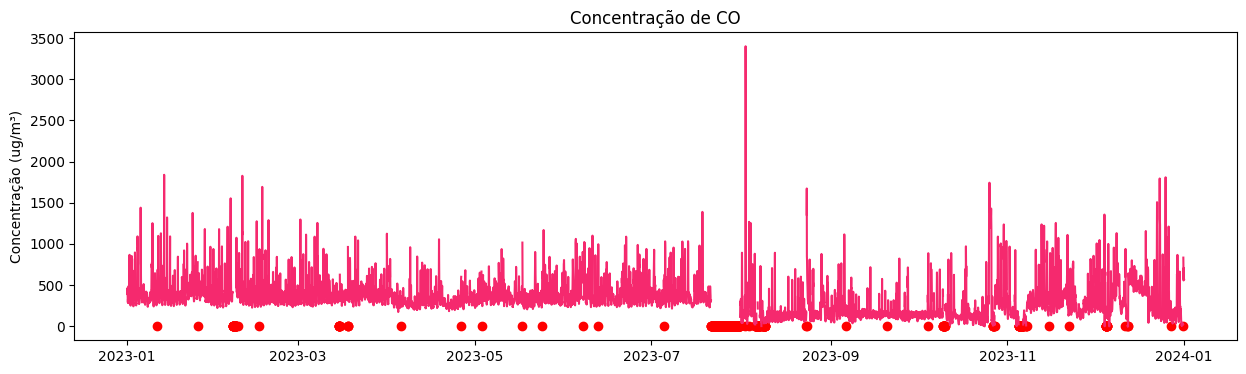

In [166]:
poluentes = laranjeiras['Poluente'].unique().tolist()
laranjeiras['Valor'] = laranjeiras['Valor'].mask(laranjeiras['Valor'] < 0, np.nan)
laranjeiras['Dia_da_Semana'] = laranjeiras.index.day_name(locale='pt_BR').str[:3]
colors = ['#31ae29', '#22ef15', 'blue', '#04b1d6', '#ffce05', '#ff9905', '#ff6868', 'purple', '#f5296e']
limites = []
for ii,polu in enumerate(poluentes):
    plt.figure(figsize=(15, 4))
    df_poluente = laranjeiras.loc[laranjeiras['Poluente'] == polu].copy()
    if df_poluente['Valor'].mean()>0:
        plt.plot(df_poluente.index,df_poluente['Valor'],color = colors[ii])
        plt.scatter(df_poluente.index[df_poluente.iloc[:,8].isna()],np.zeros(np.sum(df_poluente.iloc[:,8].isna())),color='red')
        label_limite = 'Limite de '+polu
        #ax[ii].axhline(y= limites[ii], color= colors[ii], linestyle='--', label=label_limite)
        plt.title('Concentração de '+polu)
        plt.ylabel('Concentração (ug/m³)')


### Fazendo Gráficos das Médias Diárias

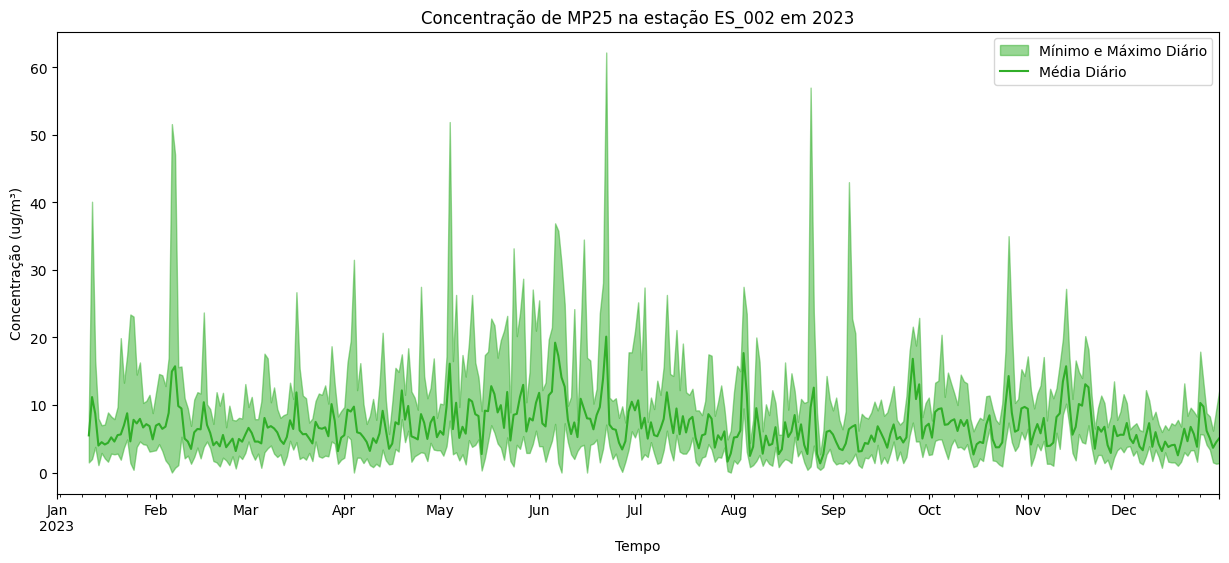

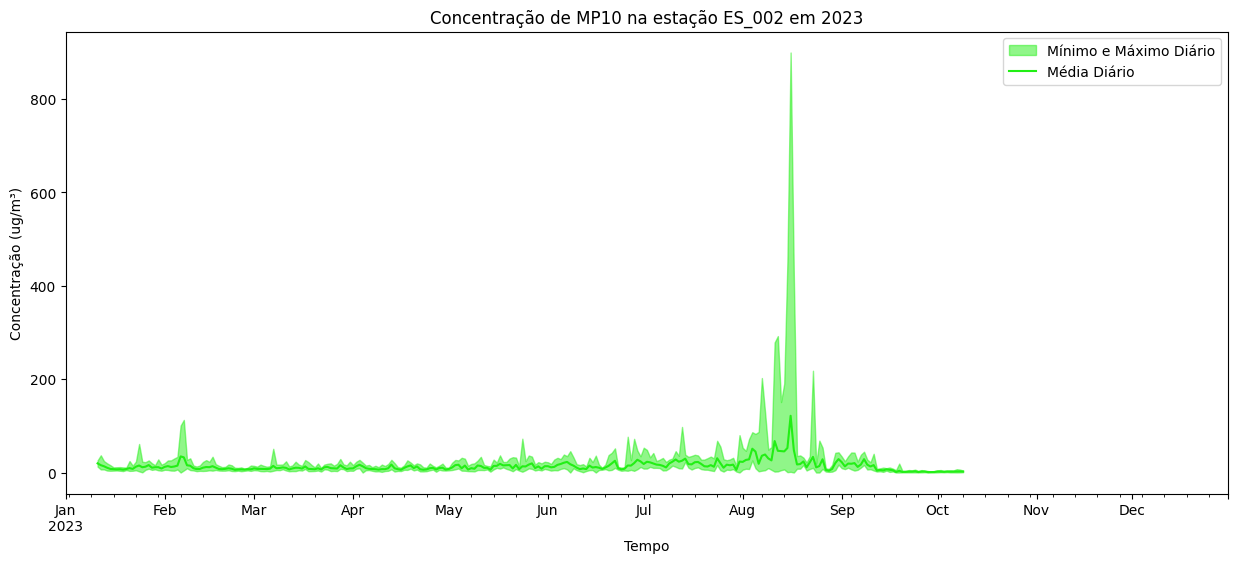

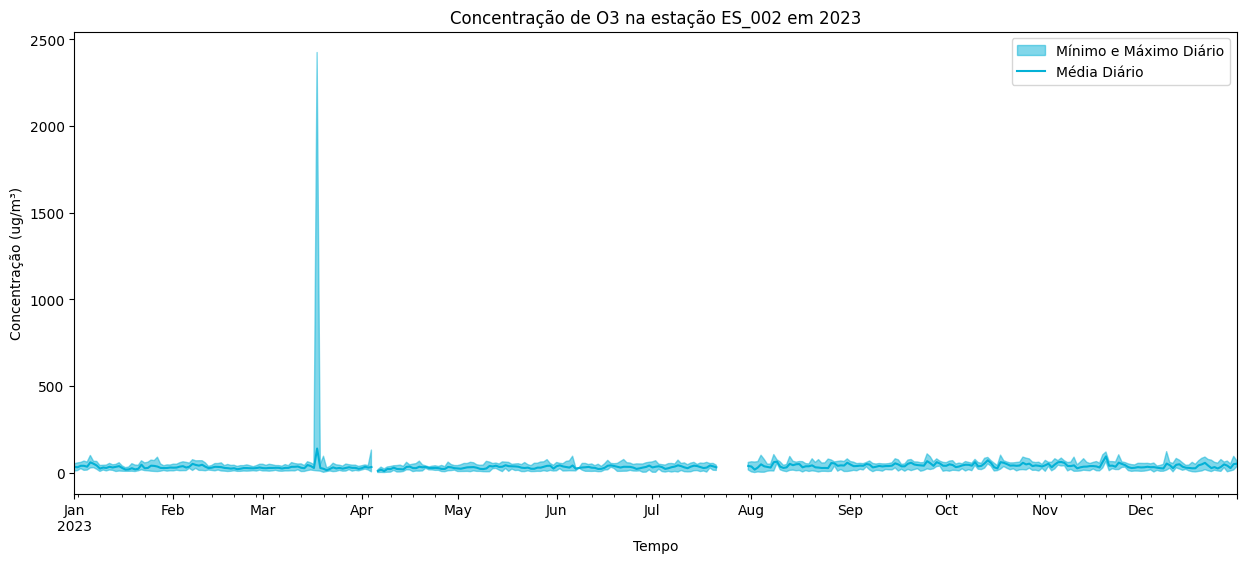

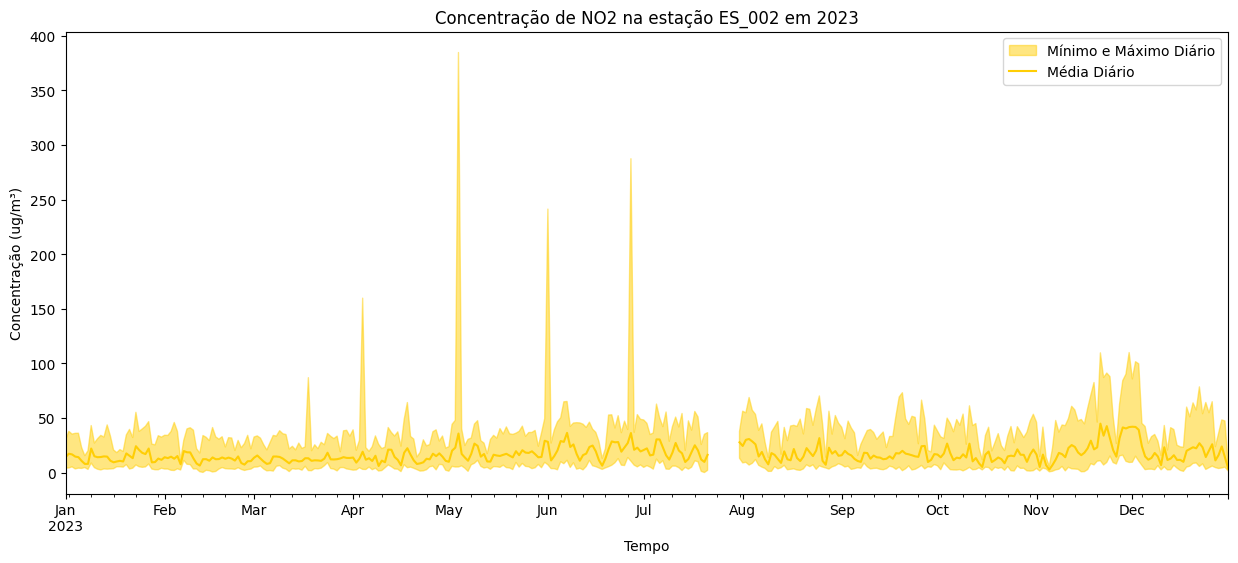

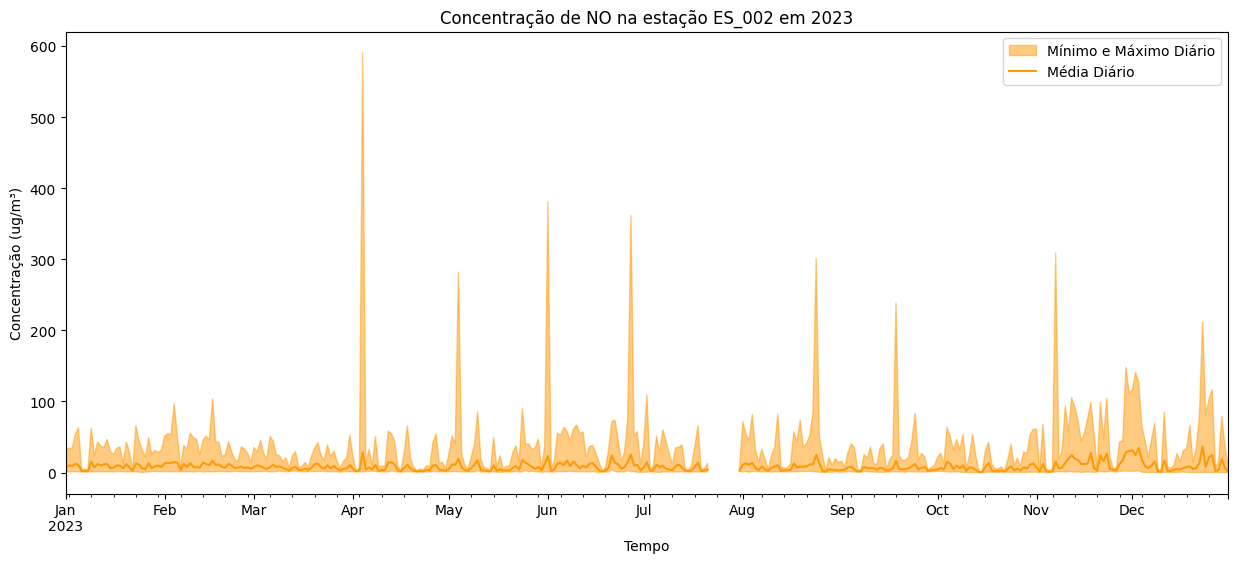

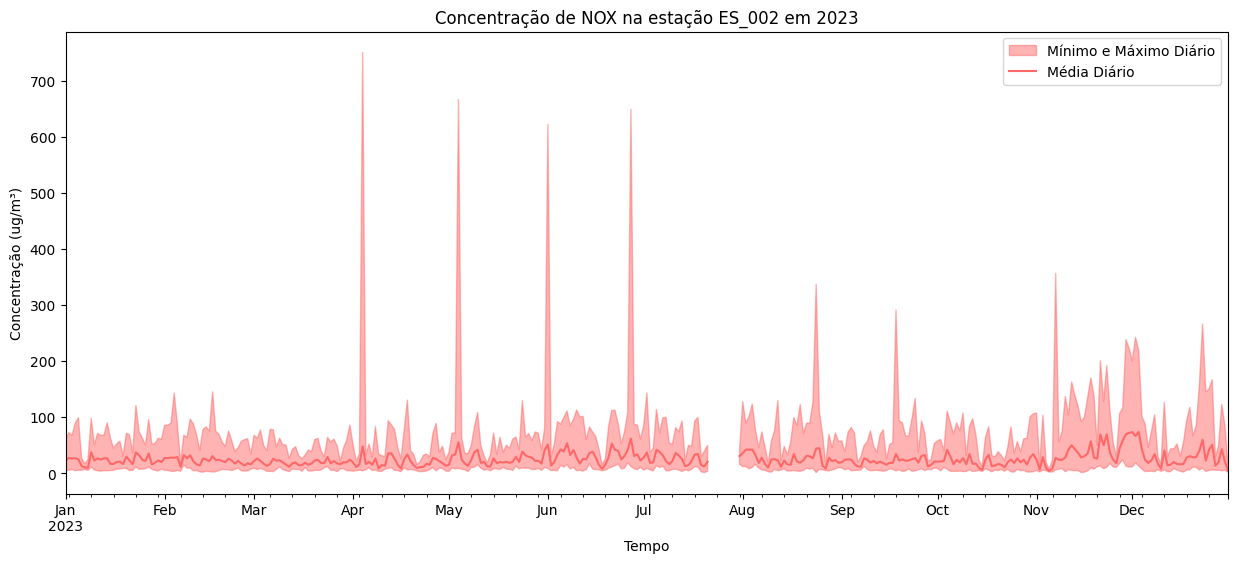

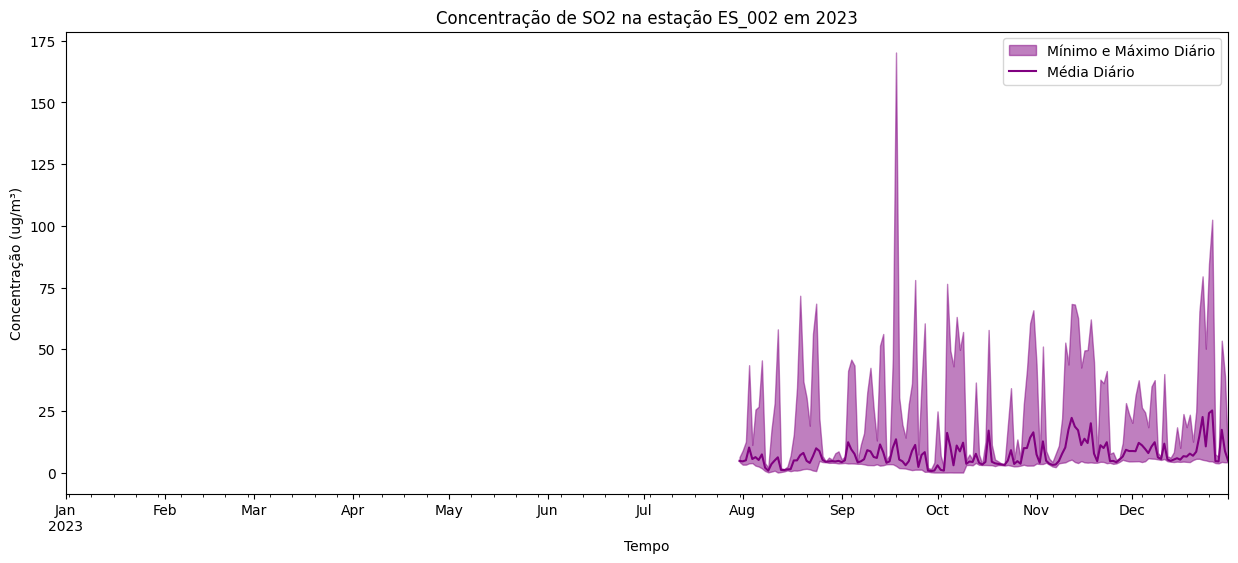

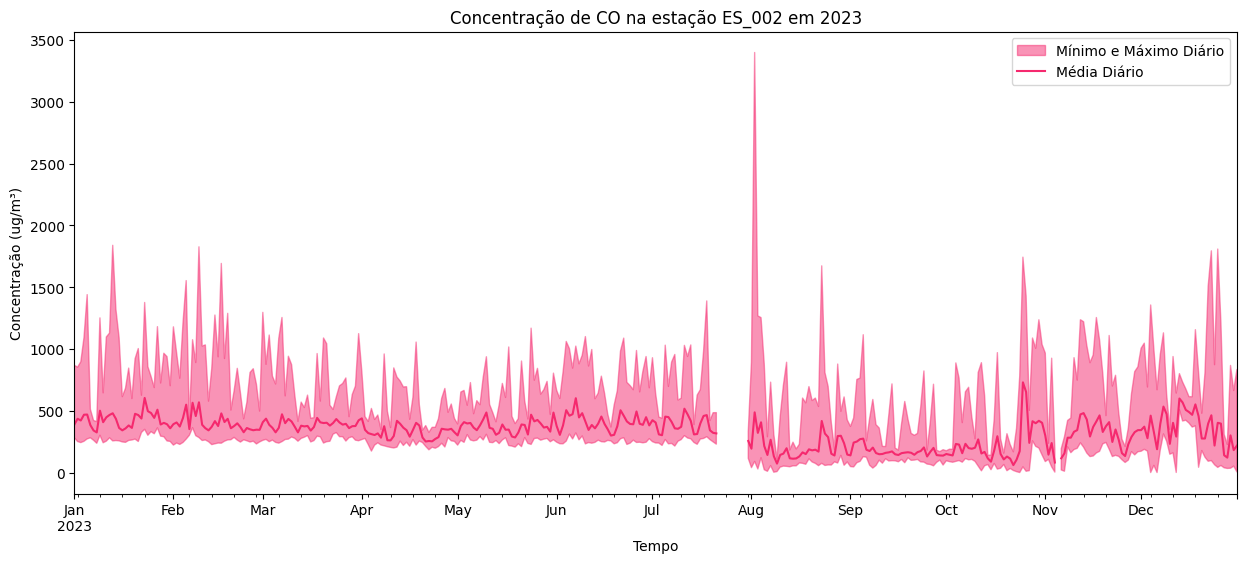

In [161]:
for jj, polu in enumerate(poluentes):   
    # Calcula a média, mínima e máxima diária
    df_poluente = laranjeiras.loc[(laranjeiras['Poluente'] == polu)]
    if df_poluente['Valor'].mean()>0:
        media_diaria_poluente = df_poluente['Valor'].resample('D').mean()  #Resample('D'),reamostrar os dados em uma base diária e calculua a media
        min_diaria_poluente = df_poluente['Valor'].resample('D').min()
        max_diaria_poluente = df_poluente['Valor'].resample('D').max()
        
        plt.figure(figsize=(15, 6))
        
        # Área sombreada entre os valores mínimo e máximo
        plt.fill_between(min_diaria_poluente.index, min_diaria_poluente, max_diaria_poluente, color=colors[jj], alpha=0.5, label='Mínimo e Máximo Diário')
        
        # Plota a média diária
        media_diaria_poluente.plot(color=colors[jj], legend=True, label='Média Diário')
        
        plt.xlabel('Tempo')
        plt.ylabel('Concentração (ug/m³)')
        plt.title('Concentração de '+polu+' na estação ES_002 em 2023')
        plt.legend()
        plt.show()
        

### Plotando Gráficos Boxsplot

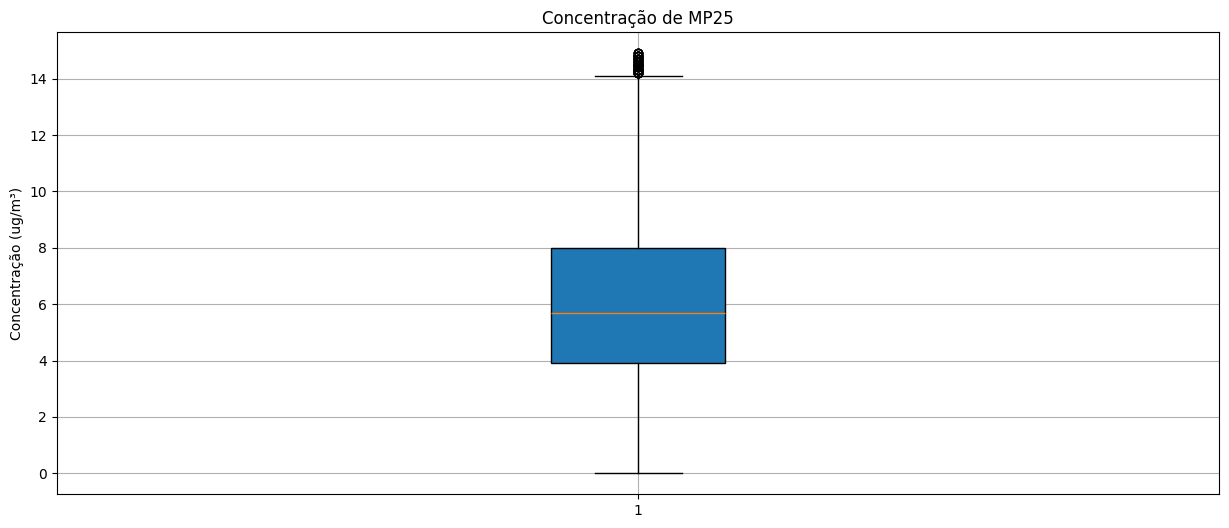

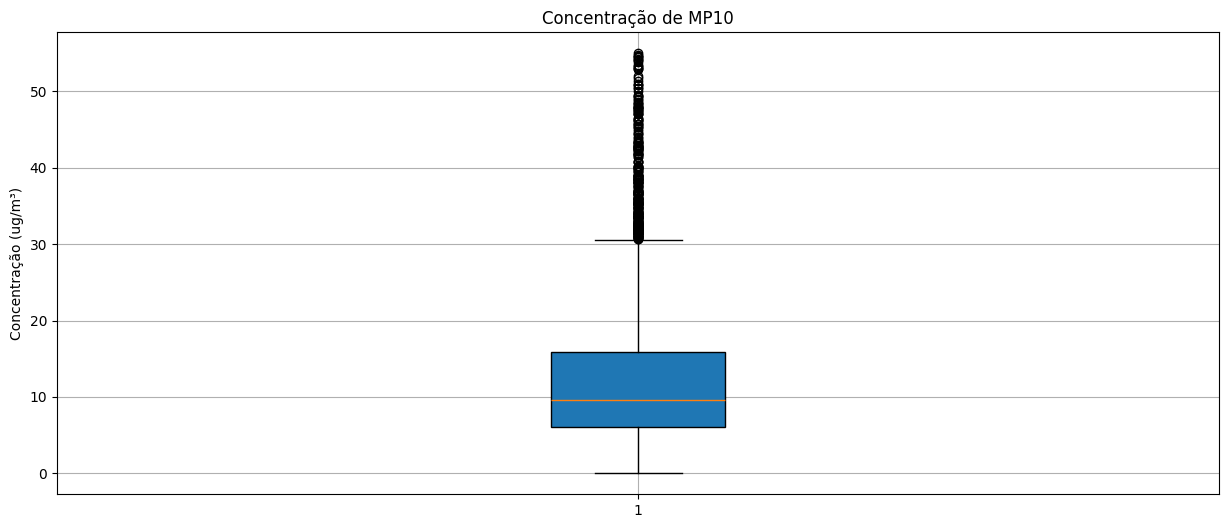

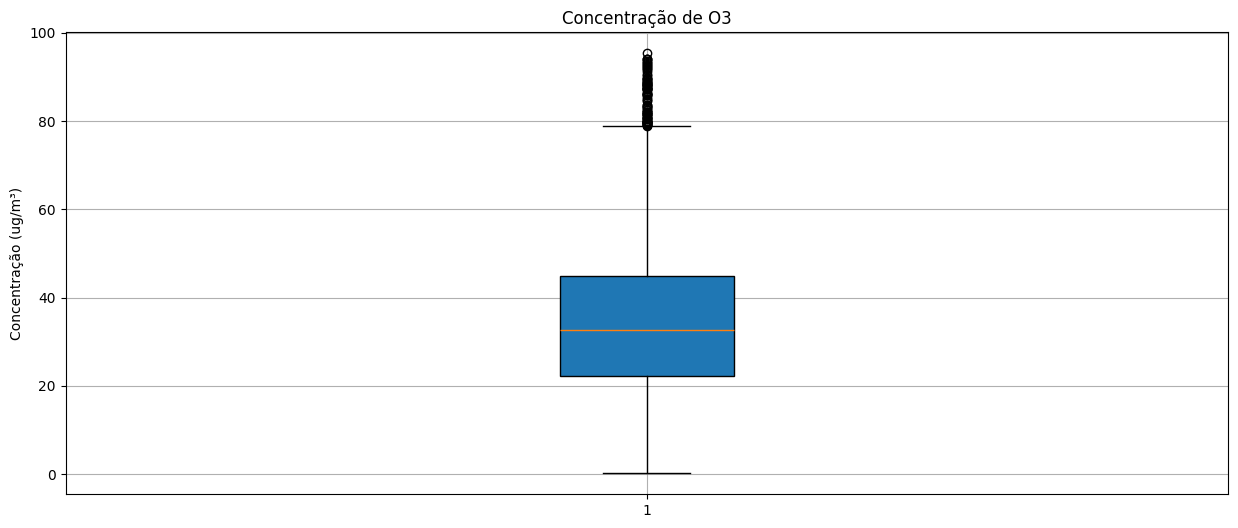

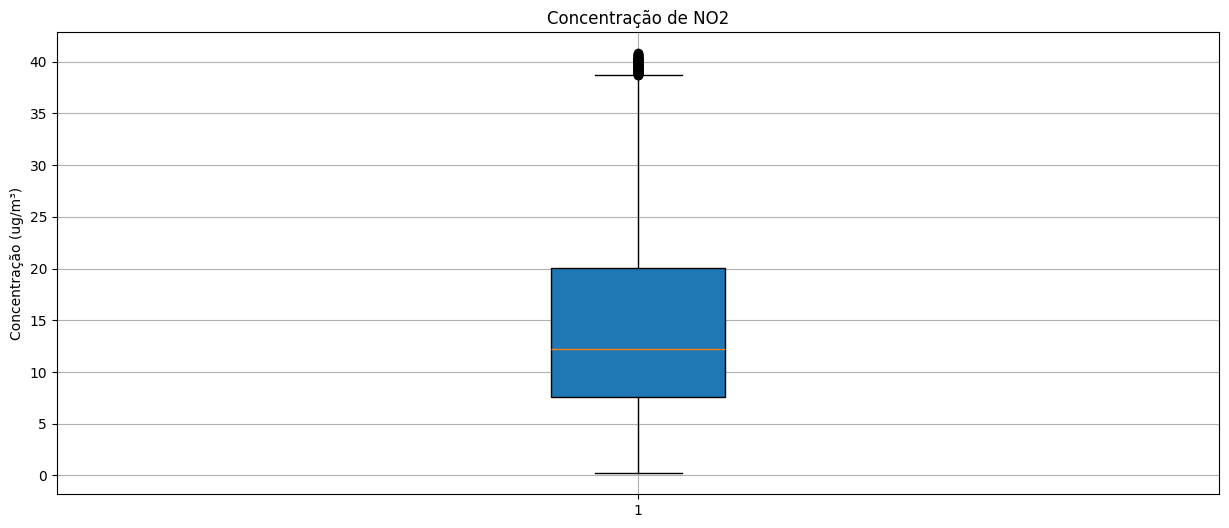

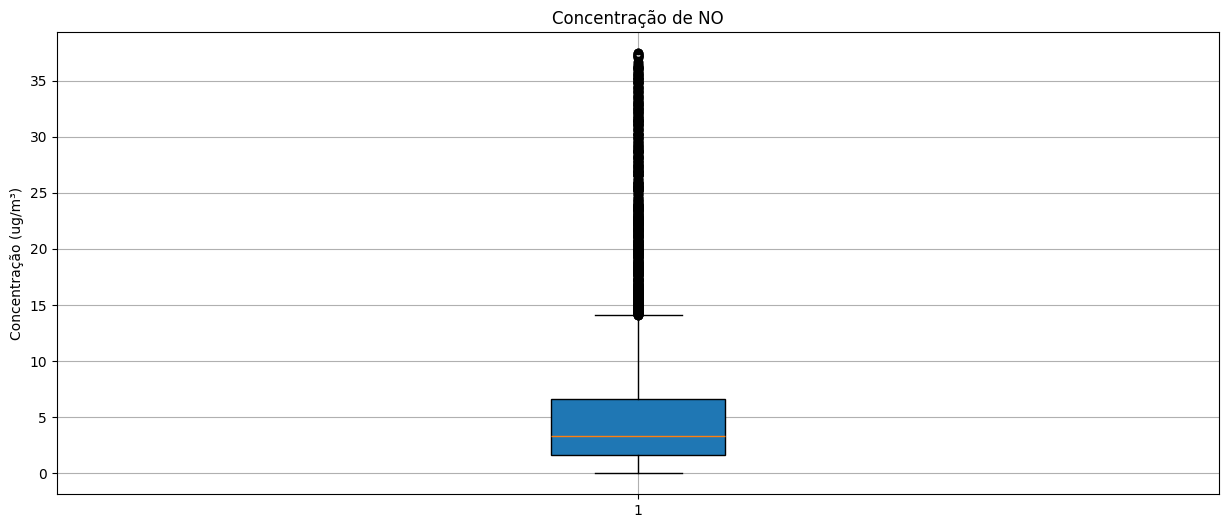

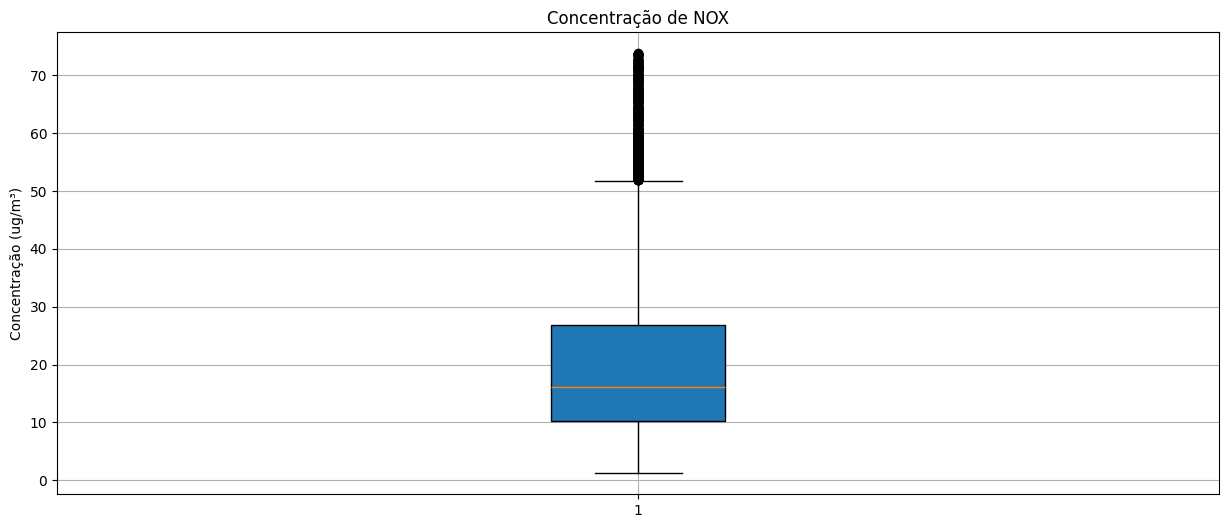

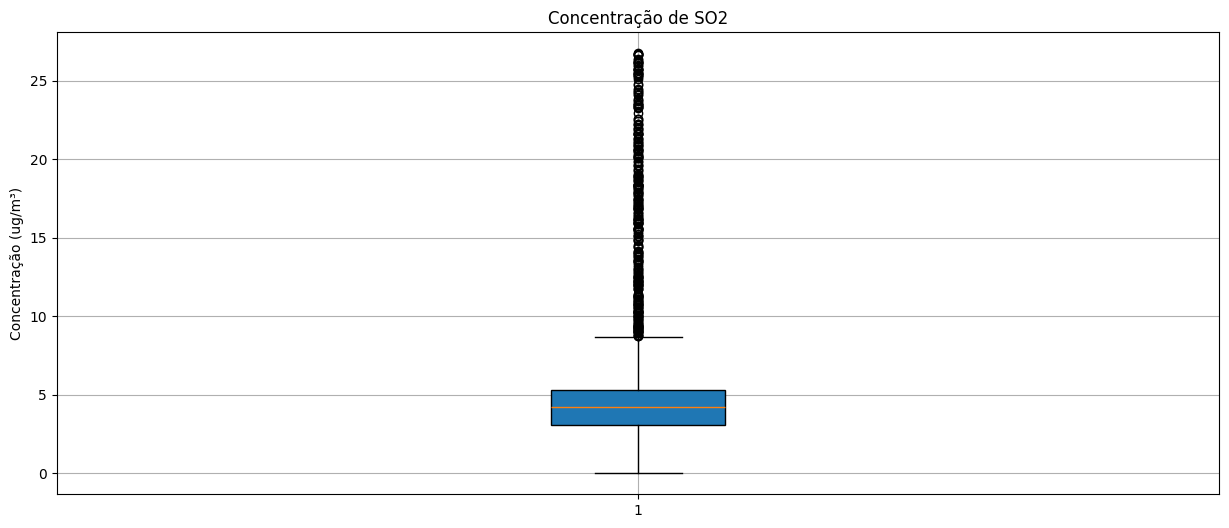

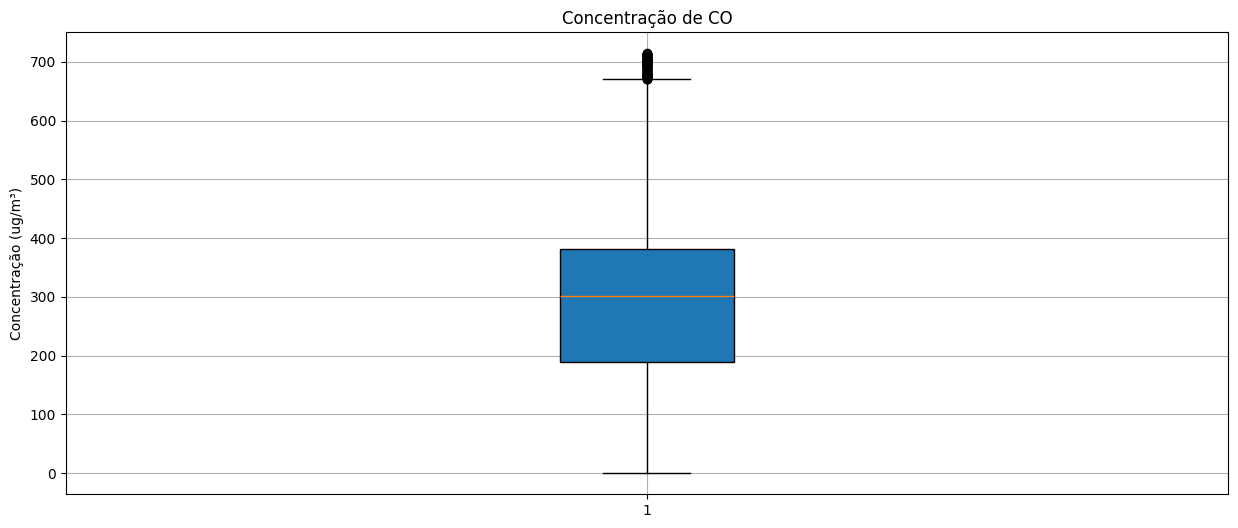

In [175]:
for polu in poluentes:
    df_poluente = laranjeiras.loc[(laranjeiras['Poluente'] == polu)]
    # Removendo valores ausentes da coluna 'Valor'
    df_poluente = df_poluente.dropna(subset=['Valor'])
    if len(df_poluente) > 0:
        mediana = df_poluente['Valor'].median()
        desvio_padrao = df_poluente['Valor'].std()
        # Filtrar para manter apenas os valores que são menores ou iguais a 2 vezes a mediana
        df_poluente = df_poluente[(df_poluente['Valor'] >= mediana-2*desvio_padrao)&(df_poluente['Valor'] <= mediana+2*desvio_padrao)]
        
        plt.figure(figsize=(15, 6))
        plt.boxplot(df_poluente['Valor'], vert=True, patch_artist=True)    
        plt.title('Concentração de '+polu)
        plt.ylabel('Concentração (ug/m³)')
        plt.grid(True)
        plt.show()
        

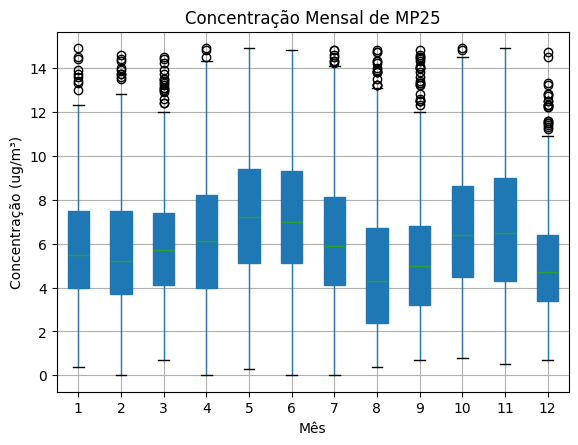

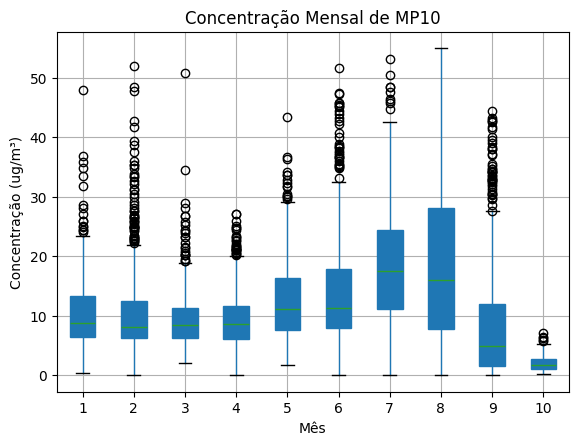

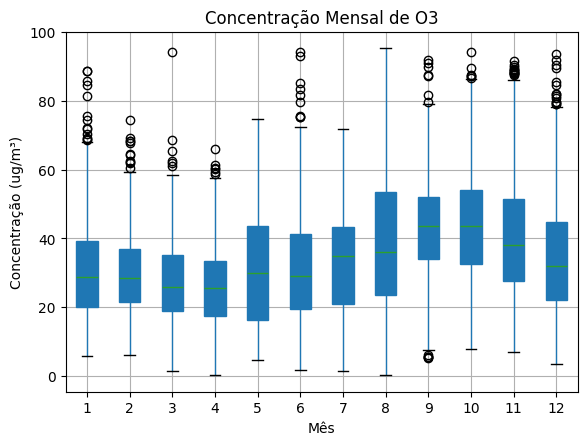

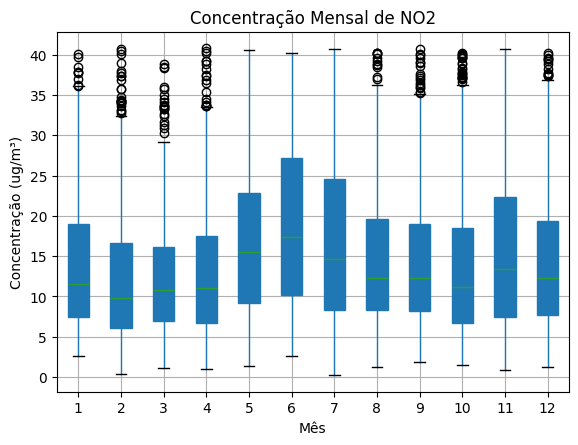

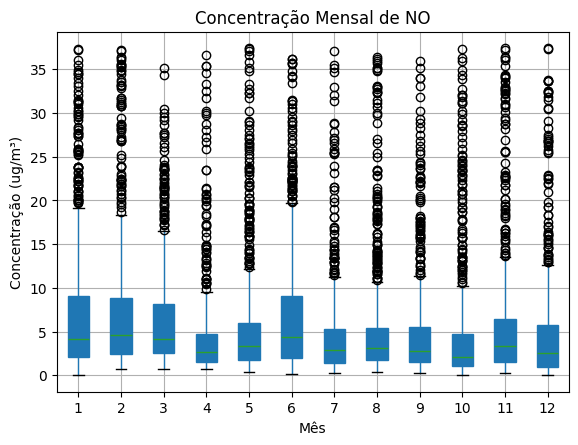

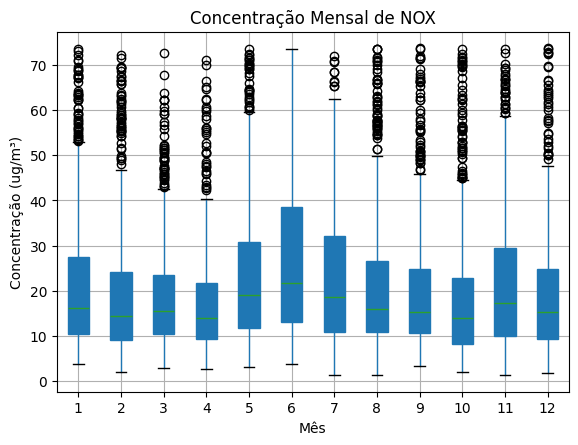

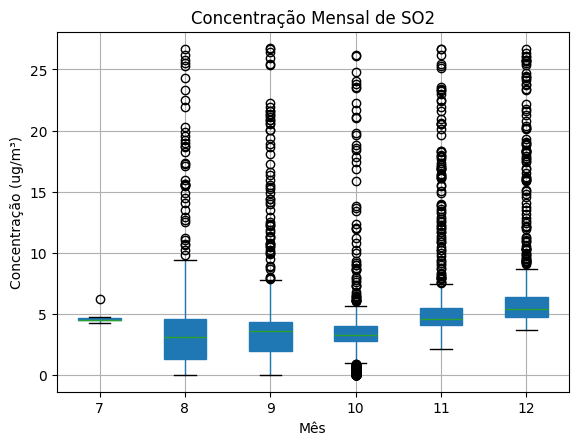

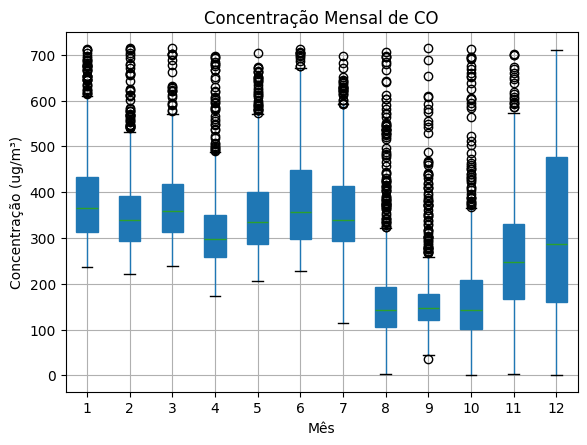

In [176]:
for polu in poluentes:
    df_poluente = laranjeiras.loc[(laranjeiras['Poluente'] == polu)]
    # Removendo valores ausentes da coluna 'Valor'
    df_poluente = df_poluente.dropna(subset=['Valor'])

    if len(df_poluente) > 0:
        mediana = df_poluente['Valor'].median()
        desvio_padrao = df_poluente['Valor'].std()
        # Filtrar para manter apenas os valores que são menores ou iguais a 2 vezes a mediana
        df_poluente = df_poluente[(df_poluente['Valor'] >= mediana-2*desvio_padrao)&(df_poluente['Valor'] <= mediana+2*desvio_padrao)]
        
        # Criando um boxplot por mês
        df_poluente.boxplot(column='Valor', by='Mes', patch_artist=True)
        
        # Ajustando o título e os rótulos
        plt.title("Concentração Mensal de "+polu)
        plt.suptitle("")  # Remove o título automático gerado pelo `by`
        plt.xlabel("Mês")
        plt.ylabel("Concentração (ug/m³)")
        plt.show()

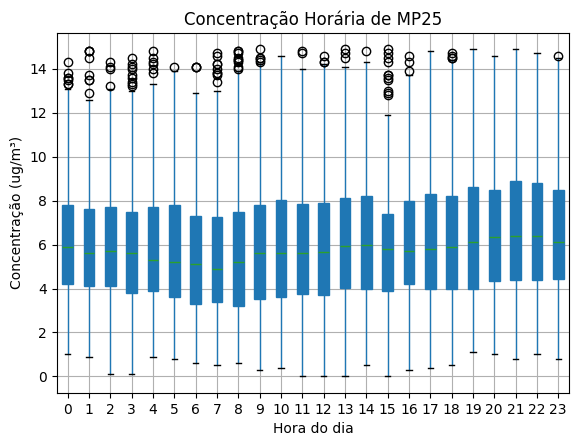

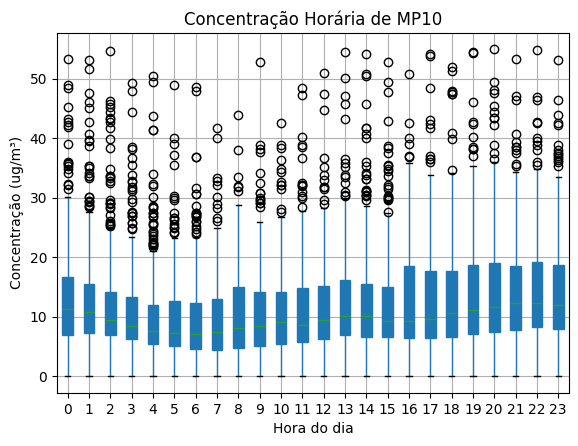

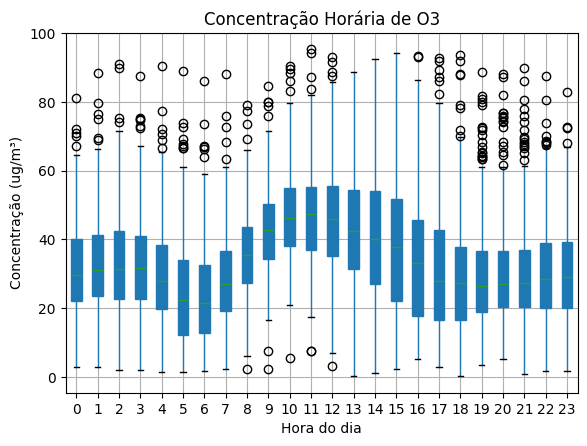

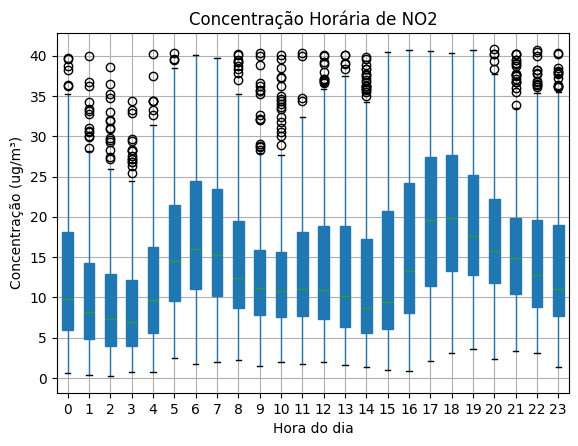

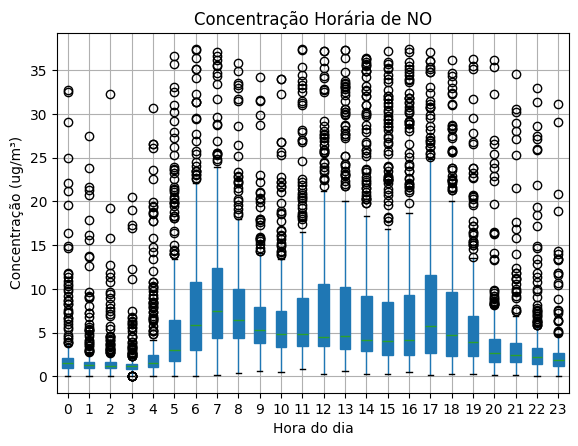

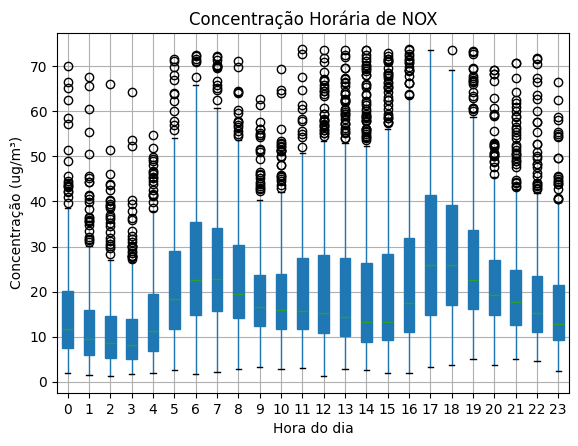

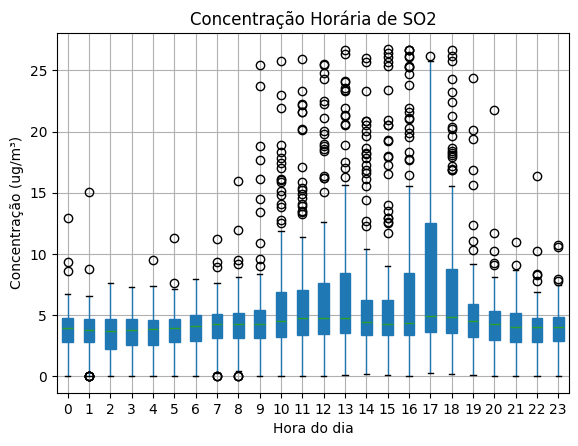

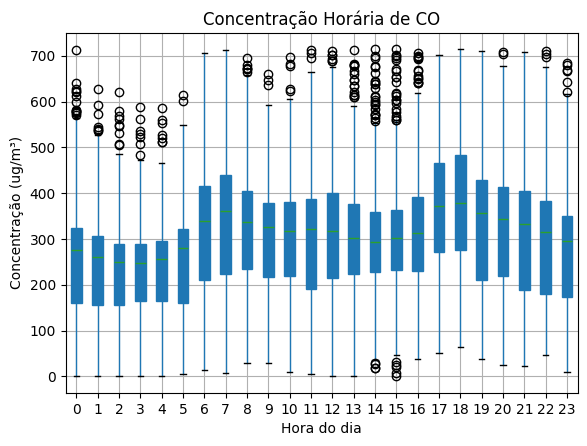

In [178]:
for polu in poluentes:
    df_poluente = laranjeiras.loc[(laranjeiras['Poluente'] == polu)]
    # Removendo valores ausentes da coluna 'Valor'
    df_poluente = df_poluente.dropna(subset=['Valor'])

    if len(df_poluente) > 0:
        mediana = df_poluente['Valor'].median()
        desvio_padrao = df_poluente['Valor'].std()
        # Filtrar para manter apenas os valores que são menores ou iguais a 2 vezes a mediana
        df_poluente = df_poluente[(df_poluente['Valor'] >= mediana-2*desvio_padrao)&(df_poluente['Valor'] <= mediana+2*desvio_padrao)]
        
        # Criando um boxplot por mês
        df_poluente.boxplot(column='Valor', by='Hora', patch_artist=True)
        
        # Ajustando o título e os rótulos
        plt.title("Concentração Horária de "+polu)
        plt.suptitle("")  # Remove o título automático gerado pelo `by`
        plt.xlabel("Hora do dia")
        plt.ylabel("Concentração (ug/m³)")
        plt.show()

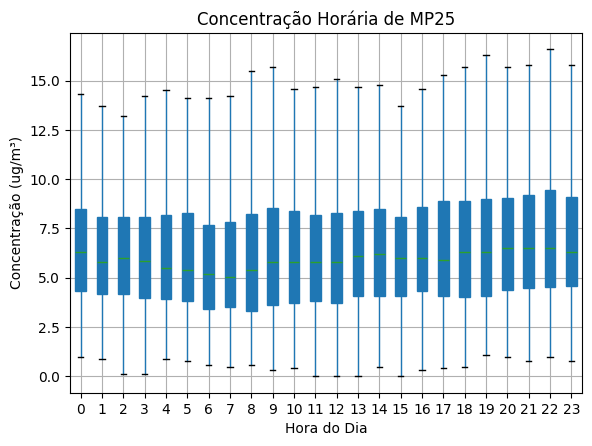

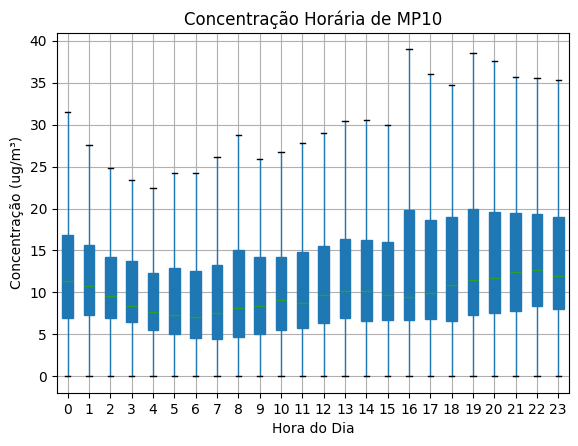

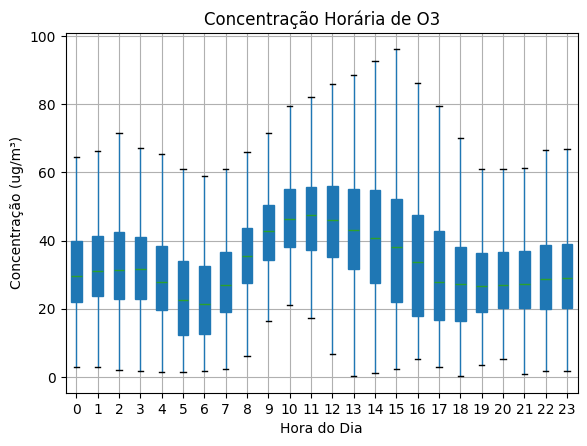

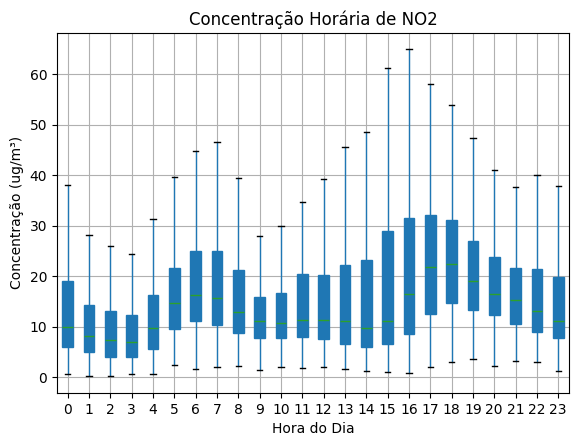

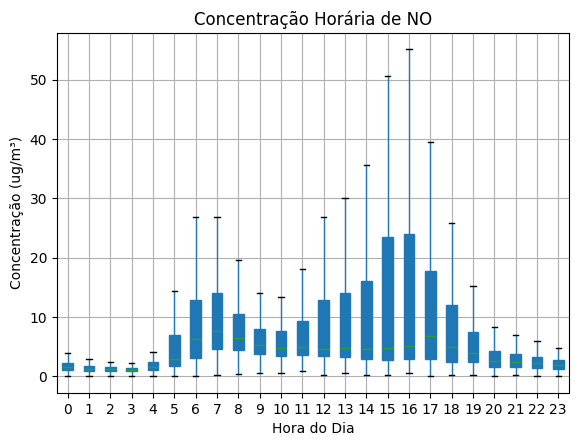

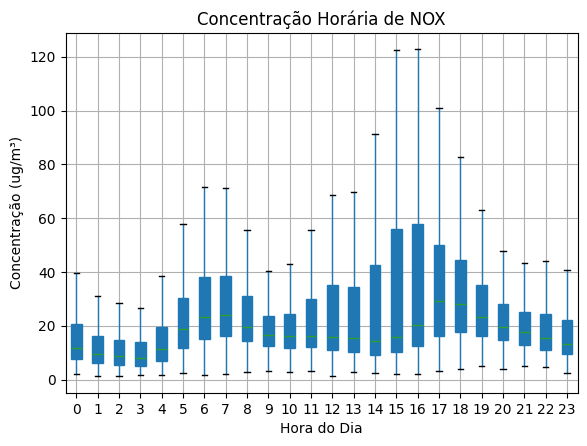

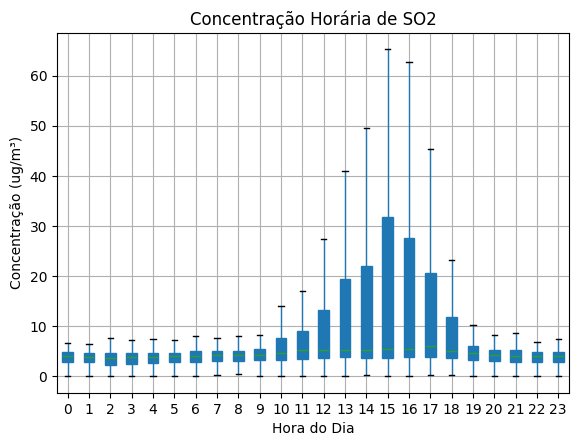

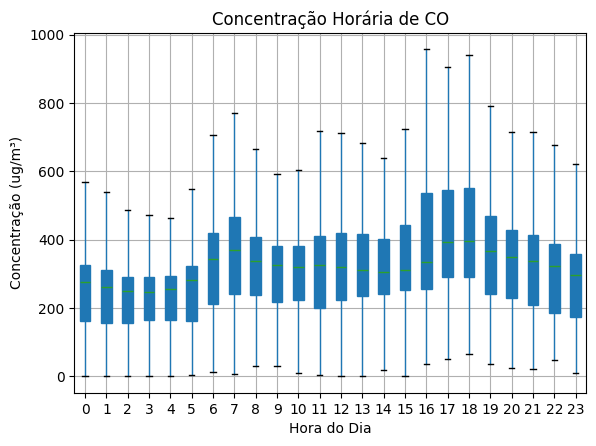

In [181]:
#tirando outliers
for polu in poluentes:
    df_poluente = laranjeiras.loc[(laranjeiras['Poluente'] == polu)]
    # Removendo valores ausentes da coluna 'Valor'
    df_poluente = df_poluente.dropna(subset=['Valor'])

    if len(df_poluente) > 0:
        
        # Criando um boxplot por mês
        df_poluente.boxplot(column='Valor', by='Hora', patch_artist=True,showfliers=False)
        
        # Ajustando o título e os rótulos
        plt.title("Concentração Horária de "+polu)
        plt.suptitle("")  # Remove o título automático gerado pelo `by`
        plt.xlabel("Hora do Dia")
        plt.ylabel("Concentração (ug/m³)")
        plt.show()

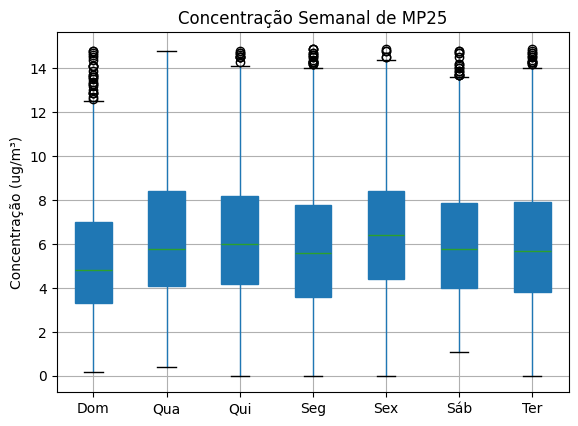

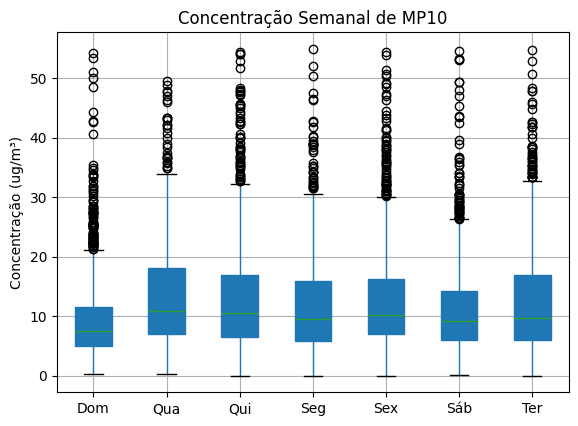

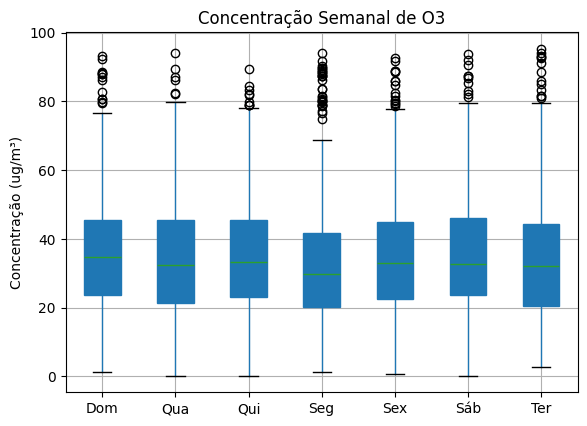

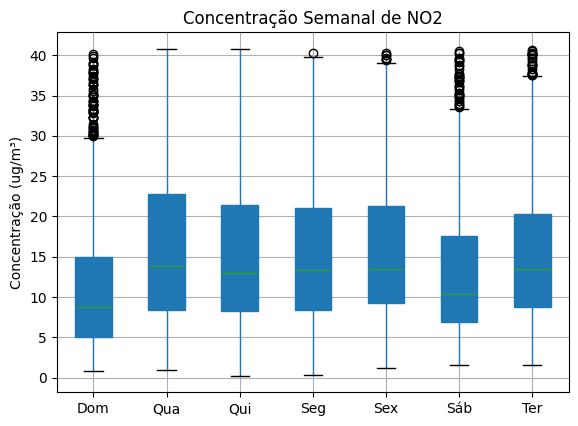

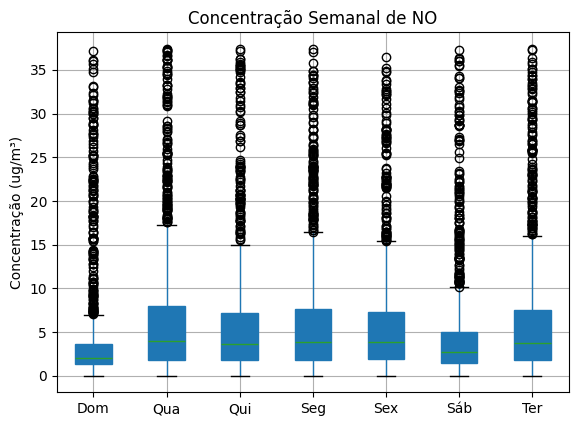

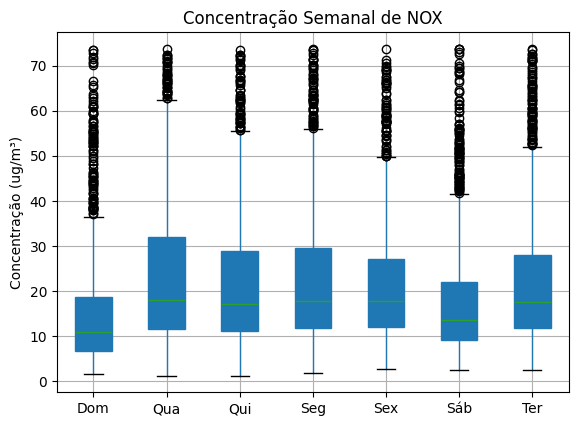

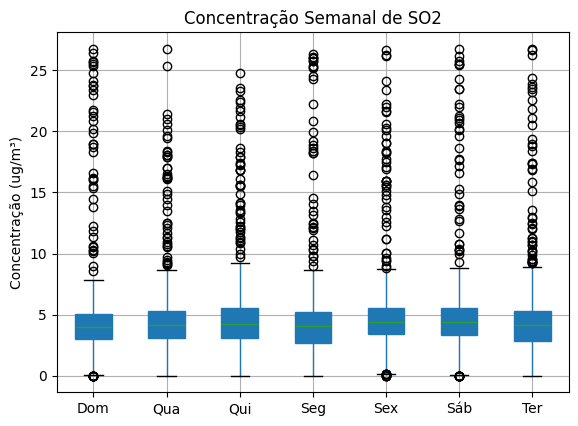

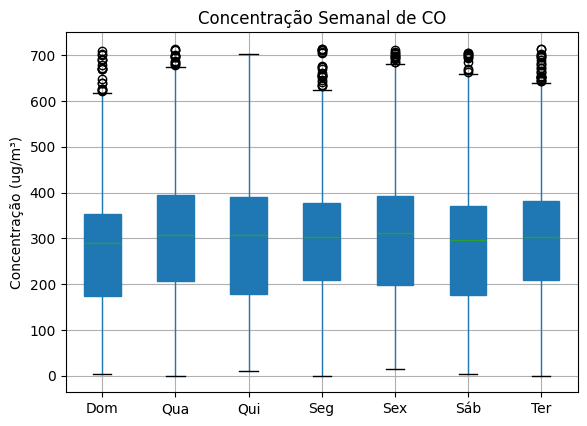

In [179]:

for polu in poluentes:
    df_poluente = laranjeiras.loc[(laranjeiras['Poluente'] == polu)].copy()
    
    # Removendo valores ausentes da coluna 'Valor'
    df_poluente = df_poluente.dropna(subset=['Valor'])

    if len(df_poluente) > 0:
        mediana = df_poluente['Valor'].median()
        desvio_padrao = df_poluente['Valor'].std()
        # Filtrar para manter apenas os valores que são menores ou iguais a 2 vezes a mediana
        df_poluente = df_poluente[(df_poluente['Valor'] >= mediana-2*desvio_padrao)&(df_poluente['Valor'] <= mediana+2*desvio_padrao)]
        
        # Criando um boxplot por mês
        df_poluente.boxplot(column='Valor', by='Dia_da_Semana', patch_artist=True)
        
        # Ajustando o título e os rótulos
        plt.title("Concentração Semanal de "+polu)
        plt.suptitle("")  # Remove o título automático gerado pelo `by`
        plt.xlabel("")
        plt.ylabel("Concentração (ug/m³)")
        plt.show()

### Estatísticas Univariadas

In [174]:
for ii,polu in enumerate(poluentes):
    df_poluente = laranjeiras.loc[(laranjeiras['Poluente'] == polu)].copy()
    print(f'\nEstatísticas Descritivas para o Poluente {polu} (coluna "Valor"):')
    print(df_poluente['Valor'].describe())
    print("\nEstatísticas descritivas por mês:")
    print(df_poluente.groupby('Mes')['Valor'].describe())
    print("\nEstatísticas descritivas por hora:")
    print(df_poluente.groupby('Hora')['Valor'].describe())
    print("\nEstatísticas descritivas por dia da semana:")
    print(df_poluente.groupby('Dia_da_Semana')['Valor'].describe())



Estatísticas Descritivas para o Poluente MP25 (coluna "Valor"):
count    8464.000000
mean        6.875461
std         4.511522
min         0.000000
25%         4.000000
50%         5.900000
75%         8.500000
max        62.200000
Name: Valor, dtype: float64

Estatísticas descritivas por mês:
     count      mean       std  min    25%  50%     75%   max
Mes                                                          
1    489.0  6.331902  3.824962  0.4  4.100  5.6   7.800  40.1
2    663.0  6.582353  5.078669  0.0  3.800  5.4   7.900  51.6
3    734.0  6.167302  3.025534  0.7  4.100  5.7   7.500  26.7
4    720.0  6.617500  3.576068  0.0  4.000  6.2   8.400  31.5
5    744.0  8.758199  5.230266  0.3  5.400  7.7  10.700  51.9
6    720.0  9.519722  6.461972  0.0  5.575  7.8  11.600  62.2
7    738.0  6.627913  3.737529  0.0  4.125  6.0   8.400  27.4
8    738.0  5.966802  5.141551  0.4  2.600  4.6   7.500  57.0
9    716.0  6.162709  4.418011  0.7  3.200  5.2   7.400  43.0
10   742.0  6.979245  